In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [57]:
from sklearn.datasets import load_iris

data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [61]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

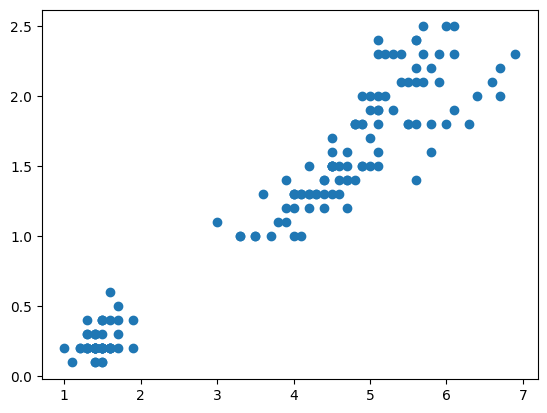

In [62]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [63]:
k_range = range(1, 10)
sse = []
features_to_cluster = ['petal length (cm)', 'petal width (cm)']

for k in k_range:
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 42)
    model.fit(df[features_to_cluster])
    sse.append(model.inertia_)

In [64]:
sse

[550.8953333333334,
 86.39021984551397,
 31.41288566827698,
 19.483000899685113,
 14.701112010796223,
 11.147086299967427,
 10.241111940993065,
 8.506673453996983,
 7.137550815670394]

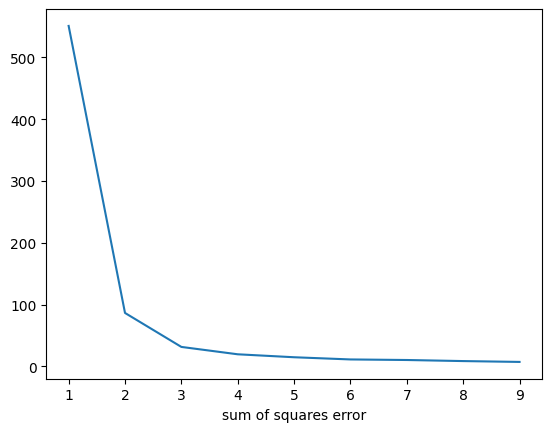

In [65]:
plt.xlabel("K")
plt.xlabel("sum of squares error")
plt.plot(k_range, sse)

# So the value of K will be three then

In [68]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_pred

y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [69]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
147,6.5,3.0,5.2,2.0,2,1
58,6.6,2.9,4.6,1.3,1,2
143,6.8,3.2,5.9,2.3,2,1
4,5.0,3.6,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
48,5.3,3.7,1.5,0.2,0,0
55,5.7,2.8,4.5,1.3,1,2
57,4.9,2.4,3.3,1.0,1,2
133,6.3,2.8,5.1,1.5,2,1
52,6.9,3.1,4.9,1.5,1,2


In [70]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

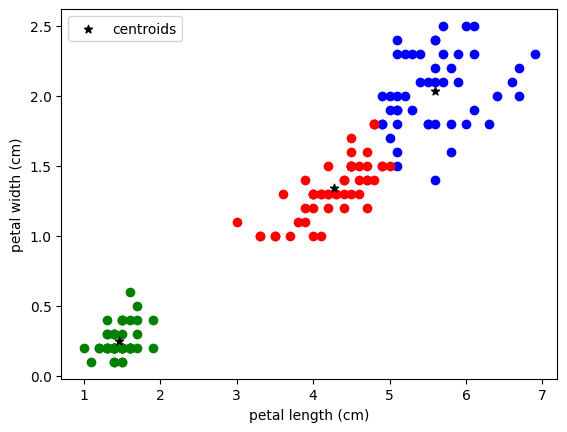

In [76]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = '*', color = 'black', label='centroids')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

## WITH SCALING

In [78]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
df['petal length (cm)'] = s.fit_transform(df[['petal length (cm)']])
df['petal length (cm)']

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal length (cm), Length: 150, dtype: float64

In [79]:
df['petal width (cm)'] = s.fit_transform(df[['petal width (cm)']])
df['petal width (cm)']

0      0.041667
1      0.041667
2      0.041667
3      0.041667
4      0.041667
         ...   
145    0.916667
146    0.750000
147    0.791667
148    0.916667
149    0.708333
Name: petal width (cm), Length: 150, dtype: float64

In [80]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,0.067797,0.041667,0,0
1,4.9,3.0,0.067797,0.041667,0,0
2,4.7,3.2,0.050847,0.041667,0,0
3,4.6,3.1,0.084746,0.041667,0,0
4,5.0,3.6,0.067797,0.041667,0,0


In [84]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1, inplace = True)

In [85]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_pred

y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [86]:
df.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


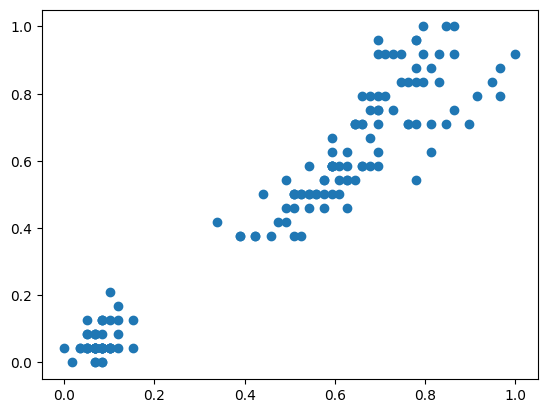

In [87]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

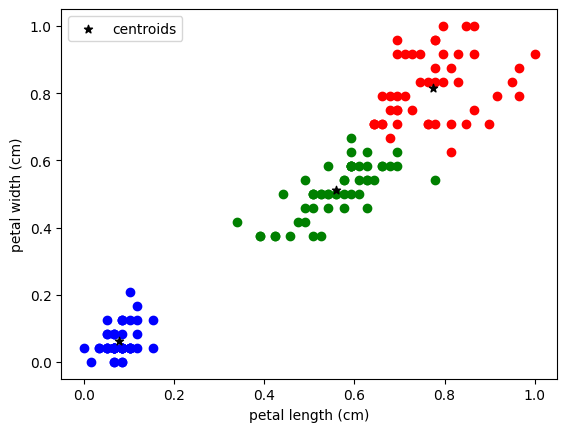

In [88]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = '*', color = 'black', label='centroids')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()